In [207]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [208]:
df = pd.read_csv("accident_report.csv")

df.head()

,ContactDate,Beat,Race,Sex,EncounterType,ReasonForEncounter,Search,TypeOfSearch,ResultOfSearch,ResultOfEncounter,IntelligenceLedFactor
0,1-Jan,27Y,Hispanic,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
1,1-Jan,27Y,Hispanic,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
2,1-Jan,27Y,Other,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
3,1-Jan,04X,White,Male,Pedestrian,Probable Cause,Yes,Incident to Arrest,Yes,Misdemeanor Arrest,No
4,1-Jan,19X,Afr American,Male,Vehicle,Traffic Violation,Yes,Incident to Arrest,None,Misdemeanor Arrest,No


In [ ]:
#df.info

In [209]:
#df.isnull().count()
df.ResultOfEncounter.count()

2849

In [130]:
df.Sex.count()


2849

In [65]:
df.shape

(2849, 11)

In [148]:
df.columns

Index(['ContactDate', 'Beat', 'Race', 'Sex', 'EncounterType',
       'ReasonForEncounter', 'Search', 'TypeOfSearch', 'ResultOfSearch',
       'ResultOfEncounter', 'IntelligenceLedFactor'],
      dtype='object')

In [193]:
df.EncounterType.count()

2849

In [201]:
#get the number of male from categorical oridnal variable
def Count_by_race(Hispanic,Other,White,AfrAmerican):
    Count_Hispa,Count_Other,Count_White,Count_Afr = 0,0,0,0   
    for idx, key in enumerate(df.Race):
        if key == 'Hispanic':
            Count_Hispa += 1
        if key == "Other":
               Count_Other += 1
        if key == "White":
            Count_White += 1
        if key == "Afr American":
            Count_Afr += 1
            
    print(f"Hispanic ={Count_Hispa}")
    print(f"Other = {Count_Other}")
    print(f"White = {Count_White}")
    print(f"AfrAmerican = {Count_Afr}")
       
    return  Count_Hispa, Count_Other, Count_White, Count_Afr
Hispanic,Other,White,AfrAmerican = 0,0,0,0 
print(Count_by_race(Hispanic, Other, White, AfrAmerican))


Hispanic =699
Other = 100
White = 198
AfrAmerican = 1747
(699, 100, 198, 1747)


In [150]:
#Data Filtering
df.loc[0:,['Race','Sex','EncounterType','ReasonForEncounter','ResultOfEncounter']].head(5)


,Race,Sex,EncounterType,ReasonForEncounter,ResultOfEncounter
0,Hispanic,Male,Pedestrian,Reasonable Suspicion,No Action
1,Hispanic,Male,Pedestrian,Reasonable Suspicion,No Action
2,Other,Male,Pedestrian,Reasonable Suspicion,No Action
3,White,Male,Pedestrian,Probable Cause,Misdemeanor Arrest
4,Afr American,Male,Vehicle,Traffic Violation,Misdemeanor Arrest


In [90]:
#Function return total population in Oakland versus by Race
def total_pop_oakland_in_2017(population):
    total_population = 425204
    White_pop = Total_population * 0.29
    Hispanic_pop = Total_population * 0.26
    AfrAmeri_pop = Total_population * 0.227
    Other_pop = Total_population - (White_pop + Hispanic_pop + AfrAmeri_pop)
    return Hispanic_pop, White_pop, AfrAmeri_pop, Other_pop


Text(0.5, 1.0, 'Totol Population of Oakland in 2017 ')

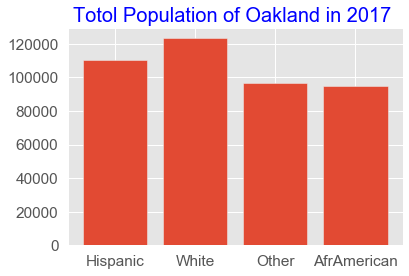

In [194]:
pop_count = pd.DataFrame(
    {'Population': list(total_pop_oakland_in_2017(425204)), 
     'Race': ['Hispanic', 'White', 'Other', 'AfrAmerican']}
)
x = np.arange(len(pop_count['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, pop_count['Population'], )
ax.set_xticks(x)
ax.set_xticklabels(pop_count['Race'])
ax.set_title("Totol Population of Oakland in 2017 ", color = 'blue', fontsize = 20)

In [ ]:

#
lst = total_pop_oakland_in_2017(425500)

In [186]:
def Count_Sex_by_race(Male, Female):
    Count_Hispa_male,Count_Hispa_female= 0,0 
    Count_Other_male, Count_Other_female = 0,0
    Count_White_male,Count_White_female = 0,0
    Count_AfrAmeri_male, Count_AfrAmeri_female =  0,0
    
    for idx, key in enumerate(df.Race):
        if key == 'Hispanic':
            if df.Sex[idx] == "Male":
                Count_Hispa_male += 1
            else: 
                
                Count_Hispa_female +=1
        if key == 'Other':
            if df.Sex[idx] == "Male":
                Count_Other_male += 1
            else: 
                Count_Other_female +=1
        if key == 'White':
            if df.Sex[idx] == "Male":
                Count_White_male += 1
            else: 
                Count_White_female +=1
        if key == 'Afr American':
            if df.Sex[idx] == "Male":
                Count_AfrAmeri_male += 1
            else: 
                Count_AfrAmeri_female +=1
                
    print("\tData break down by Sex and Race")           
    print(f"Hispanic Male = {Count_Hispa_male},\tand Female = {Count_Hispa_female}")
    print(f"Other Male = {Count_Other_male},\tand Female = {Count_Other_female}")
    print(f"White Male = {Count_White_male},\tand Female = {Count_White_female}")
    print(f"AfriAmeri Male= {Count_AfrAmeri_male}, and Female = {Count_AfrAmeri_female}")
    Male = Count_Hispa_male + Count_Other_male + Count_Other_male + Count_White_male + Count_AfrAmeri_male
    Female = Count_Hispa_female + Count_Other_female + Count_Other_female + Count_White_female + Count_AfrAmeri_female
    return Male, Female
Male, Female = 0, 0
print(Count_Sex_by_race(Male, Female))

	Data break down by Sex and Race
Hispanic Male = 578,	and Female = 121
Other Male = 77,	and Female = 23
White Male = 115,	and Female = 83
AfriAmeri Male= 1307, and Female = 440
(2154, 690)


In [ ]:
#

In [210]:
count_each_male = pd.DataFrame(
    {'Male_count_per_race': [699, 100, 198, 1747], 
     'Race': ['Hispanic ', 'Other', 'White ', 'AfrAmerican']})

Text(0.5, 1.0, 'Traffic violation by Sex and Race ')

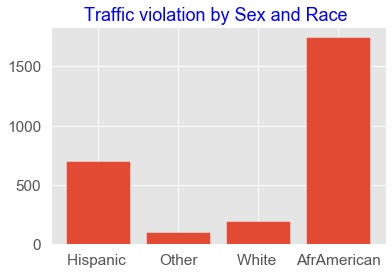

In [211]:

x = np.arange(len(count_each_male['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, count_each_male['Male_count_per_race'])
ax.set_xticks(x)
ax.set_xticklabels(count_each_male['Race'])
ax.set_title("Traffic violation by Sex and Race ",color = 'blue', fontsize = 18)



Text(0.5, 1.0, 'Traffic violation by Sex and Race')

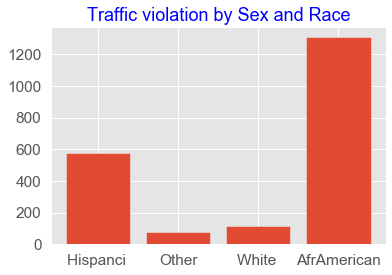

In [204]:

x = np.arange(len(count_each_male['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, count_each_male['Male_count_per_race'])
ax.set_xticks(x)
ax.set_xticklabels(count_each_male['Race'])
ax.set_title("Traffic violation by Sex and Race",color = 'blue', fontsize = 18)



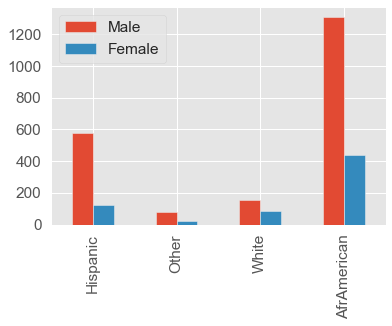

In [212]:

Male = [578 , 77, 155, 1307]
Female = [121, 23, 83, 440]
index = ['Hispanic', 'Other', 'White','AfrAmerican']
df = pd.DataFrame({'Male': Male,
                    'Female': Female}, index=index)
ax = df.plot.bar()

In [ ]:
count_each_male = pd.DataFrame(
    {'Male_count_per_race': [578, 77, 115, 1307], 
     'Race': ['Hispanci Male', 'Other Male', 'White Male', 'Afr American Male']}
)
# x will be the left hand edge of the bars.
x = np.arange(len(count_each_male['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, count_each_male['Male_count_per_race'])
ax.set_xticks(x)
ax.set_xticklabels(count_each_male['Race'])
ax.set_title("Traffic violation by Sex and Race Male",color = 'blue', fontsize = 18)